In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/meal-plan-and-exercise-schedule-gender-goal-bmi/GYM.csv


In [2]:
# load dataset
df = pd.read_csv("/kaggle/input/meal-plan-and-exercise-schedule-gender-goal-bmi/GYM.csv")
df

,Gender,Goal,BMI Category,Exercise Schedule,Meal Plan
0,Female,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...
1,Male,fat_burn,Underweight,"Light weightlifting, Yoga, and 2000 steps walking","High-calorie, protein-rich diet: Whole milk, p..."
2,Male,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...
3,Male,muscle_gain,Overweight,"High-intensity interval training (HIIT), Cardi...","Low-carb, high-fiber diet: Avocado, grilled fi..."
4,Female,muscle_gain,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...
...,...,...,...,...,...
79995,Male,fat_burn,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...
79996,Female,fat_burn,Underweight,"Light weightlifting, Yoga, and 2000 steps walking","High-calorie, protein-rich diet: Whole milk, p..."
79997,Female,muscle_gain,Obesity,"Low-impact cardio, Swimming, and 10000 steps w...","Low-calorie, nutrient-dense diet with portion ..."
79998,Male,fat_burn,Normal weight,"Moderate cardio, Strength training, and 5000 s...",Balanced diet with moderate protein and carboh...


In [3]:
# LETS UNDERSTAND THE DATASET
print("shape of dataset ",df.shape)
print("====================\n")
print("columns name are :- ",df.columns)
print("====================\n")
print("infromation of all columns present in the datset\n ",df.info())
print("====================\n")
print(" analysis of numerical columns\n ",df.describe())
print("====================")


shape of dataset  (80000, 5)

columns name are :-  Index(['Gender', 'Goal', 'BMI Category', 'Exercise Schedule', 'Meal Plan'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             80000 non-null  object
 1   Goal               80000 non-null  object
 2   BMI Category       80000 non-null  object
 3   Exercise Schedule  80000 non-null  object
 4   Meal Plan          80000 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB
infromation of all columns present in the datset
  None

 analysis of numerical columns
          Gender         Goal BMI Category  \
count    80000        80000        80000   
unique       2            2            4   
top     Female  muscle_gain  Underweight   
freq     40680        41020        20940   

                                        Exercise Schedule  \
count  

In [4]:
# lets find count for all categories in data
for i in df.columns:
    print(f"count of each categories in {i} \n {df[i].value_counts()}")
    print("\n======================================\n")

count of each categories in Gender 
 Gender
Female    40680
Male      39320
Name: count, dtype: int64


count of each categories in Goal 
 Goal
muscle_gain    41020
fat_burn       38980
Name: count, dtype: int64


count of each categories in BMI Category 
 BMI Category
Underweight      20940
Normal weight    19920
Overweight       19840
Obesity          19300
Name: count, dtype: int64


count of each categories in Exercise Schedule 
 Exercise Schedule
Light weightlifting, Yoga, and 2000 steps walking                          20940
Moderate cardio, Strength training, and 5000 steps walking                 19920
High-intensity interval training (HIIT), Cardio, and 8000 steps walking    19840
Low-impact cardio, Swimming, and 10000 steps walking                       19300
Name: count, dtype: int64


count of each categories in Meal Plan 
 Meal Plan
High-calorie, protein-rich diet: Whole milk, peanut butter, eggs, salmon, sweet potatoes                                                      

In [5]:
# lets count for null values present in each column
df.isnull().sum()

Gender               0
Goal                 0
BMI Category         0
Exercise Schedule    0
Meal Plan            0
dtype: int64

## feature eng

In [6]:
# WE OBSERVE THAT OUR CATEGORIES IN MEAL PLAN AND EXERCISE SECHUDLE HAS FULL EXPLAINED
# LETS RENAME THE DATA FOR BETTER UNDERSTANDING THE STATICS

# FOR EXERCISE
exercise = {
    "Light weightlifting, Yoga, and 2000 steps walking": "Light Exercise",
    "Moderate cardio, Strength training, and 5000 steps walking": "Moderate Exercise",
    "High-intensity interval training (HIIT), Cardio, and 8000 steps walking": "High Intensity Exercise",
    "Low-impact cardio, Swimming, and 10000 steps walking": "Low Impact Cardio"
}
df["Exercise Schedule"]=df["Exercise Schedule"].replace(exercise)


# FOR MEAL PLAN
meal = {
    "High-calorie, protein-rich diet: Whole milk, peanut butter, eggs, salmon, sweet potatoes": "High Calorie Protein Diet",
    "Balanced diet with moderate protein and carbohydrates: Chicken breast, brown rice, spinach, eggs, apple": "Balanced Diet",
    "Low-carb, high-fiber diet: Avocado, grilled fish, broccoli, almonds, leafy greens": "Low Carb High Fiber",
    "Low-calorie, nutrient-dense diet with portion control: carrot sticks,grilled chicken breast,steamed broccoli, Greek yogurt, mixed nuts, baked salmon, leafy greens, roasted sweet potatoes": "Low Calorie Nutrient Dense"
}

df["Meal Plan"]=df["Meal Plan"].replace(meal)


print(df["Exercise Schedule"].value_counts())
print(df["Meal Plan"].value_counts())

Exercise Schedule
Light Exercise             20940
Moderate Exercise          19920
High Intensity Exercise    19840
Low Impact Cardio          19300
Name: count, dtype: int64
Meal Plan
High Calorie Protein Diet     20940
Balanced Diet                 19920
Low Carb High Fiber           19840
Low Calorie Nutrient Dense    19300
Name: count, dtype: int64


## VISULIZATION

In [7]:
# IMPORT LIBRABRIES
import matplotlib.pyplot as plt
import seaborn as sns

Gender  Exercise Schedule      
Female  Light Exercise             10680
        Moderate Exercise          10240
        Low Impact Cardio           9960
        High Intensity Exercise     9800
Male    Light Exercise             10260
        High Intensity Exercise    10040
        Moderate Exercise           9680
        Low Impact Cardio           9340
Name: count, dtype: int64
graph for Gender


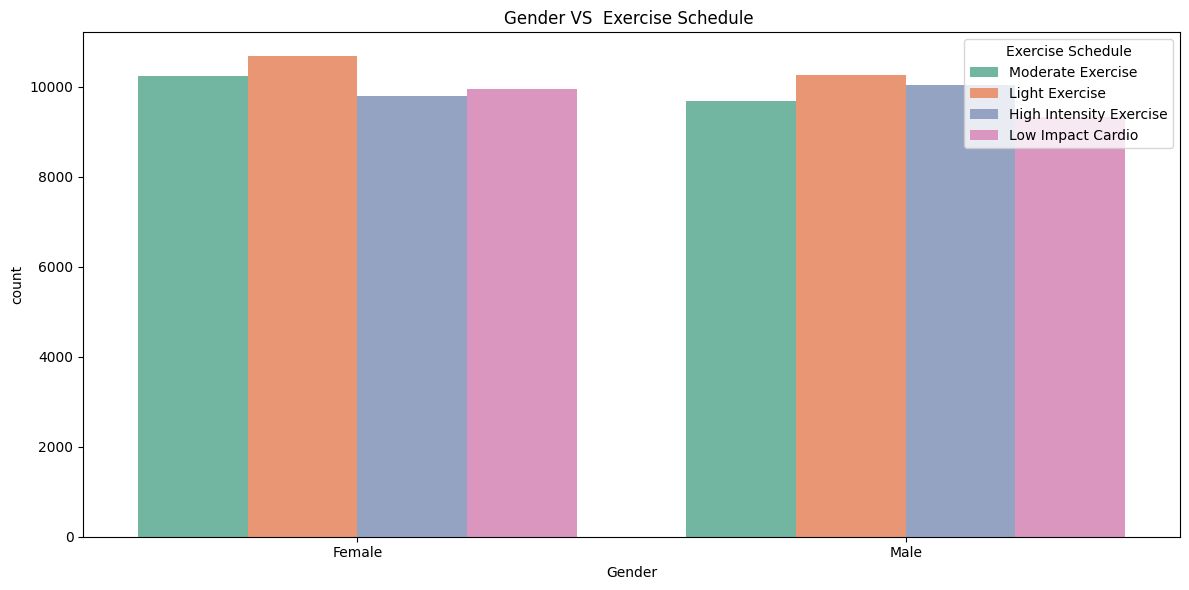

<Figure size 600x400 with 0 Axes>

Goal         Exercise Schedule      
fat_burn     Light Exercise             10480
             Moderate Exercise           9600
             Low Impact Cardio           9460
             High Intensity Exercise     9440
muscle_gain  Light Exercise             10460
             High Intensity Exercise    10400
             Moderate Exercise          10320
             Low Impact Cardio           9840
Name: count, dtype: int64
graph for Goal


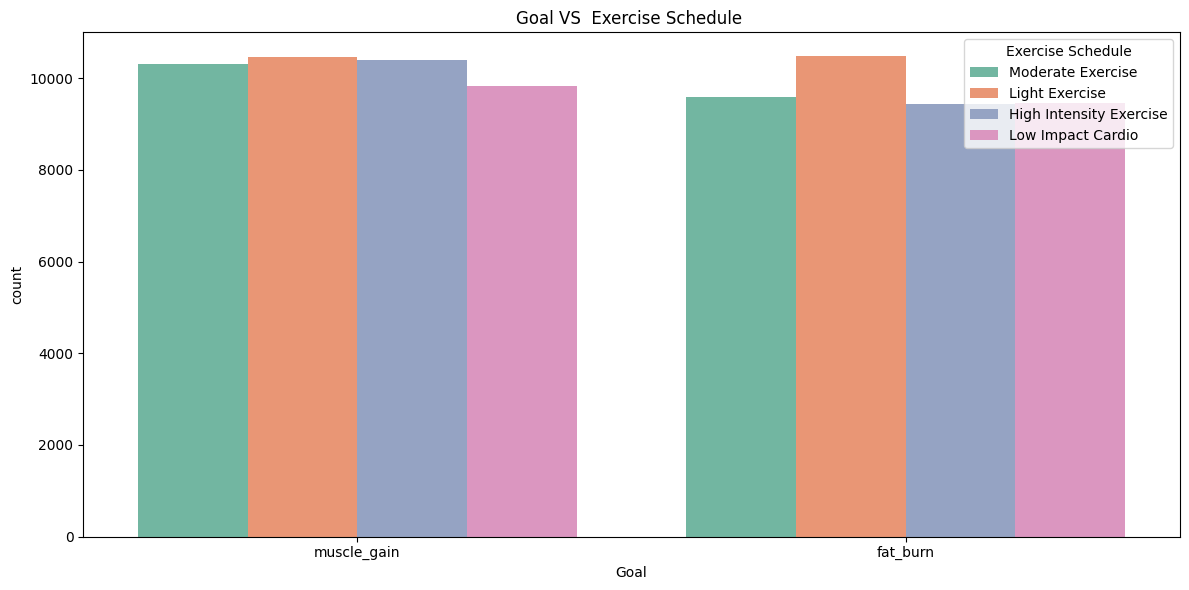

<Figure size 600x400 with 0 Axes>

BMI Category   Exercise Schedule      
Normal weight  Moderate Exercise          19920
Obesity        Low Impact Cardio          19300
Overweight     High Intensity Exercise    19840
Underweight    Light Exercise             20940
Name: count, dtype: int64
graph for BMI Category


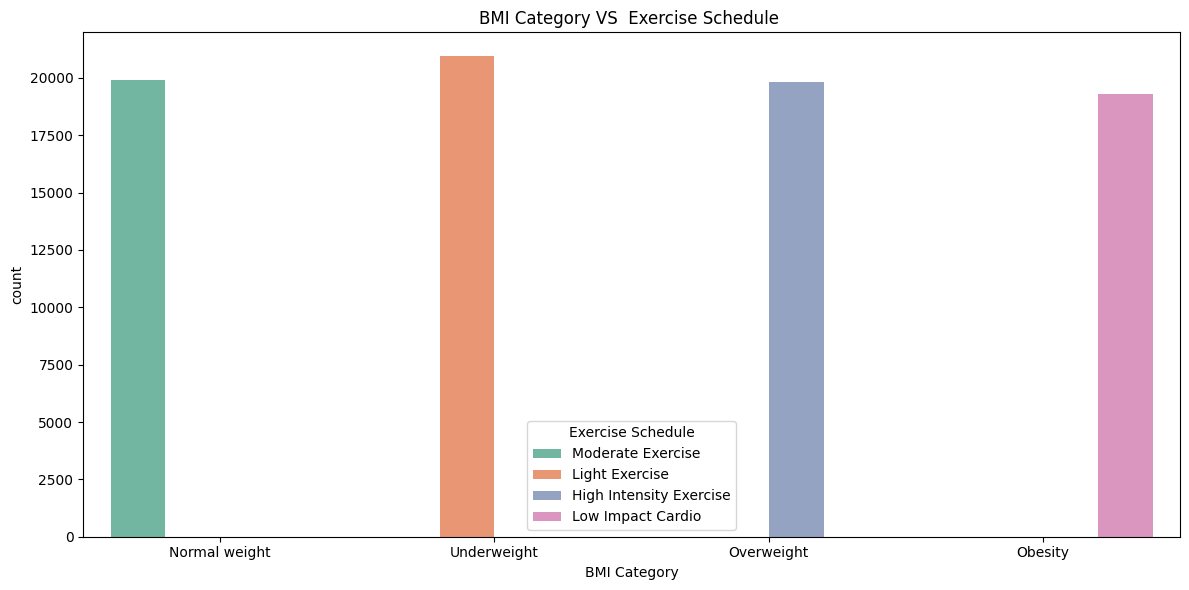

<Figure size 600x400 with 0 Axes>

Meal Plan                   Exercise Schedule      
Balanced Diet               Moderate Exercise          19920
High Calorie Protein Diet   Light Exercise             20940
Low Calorie Nutrient Dense  Low Impact Cardio          19300
Low Carb High Fiber         High Intensity Exercise    19840
Name: count, dtype: int64
graph for Meal Plan


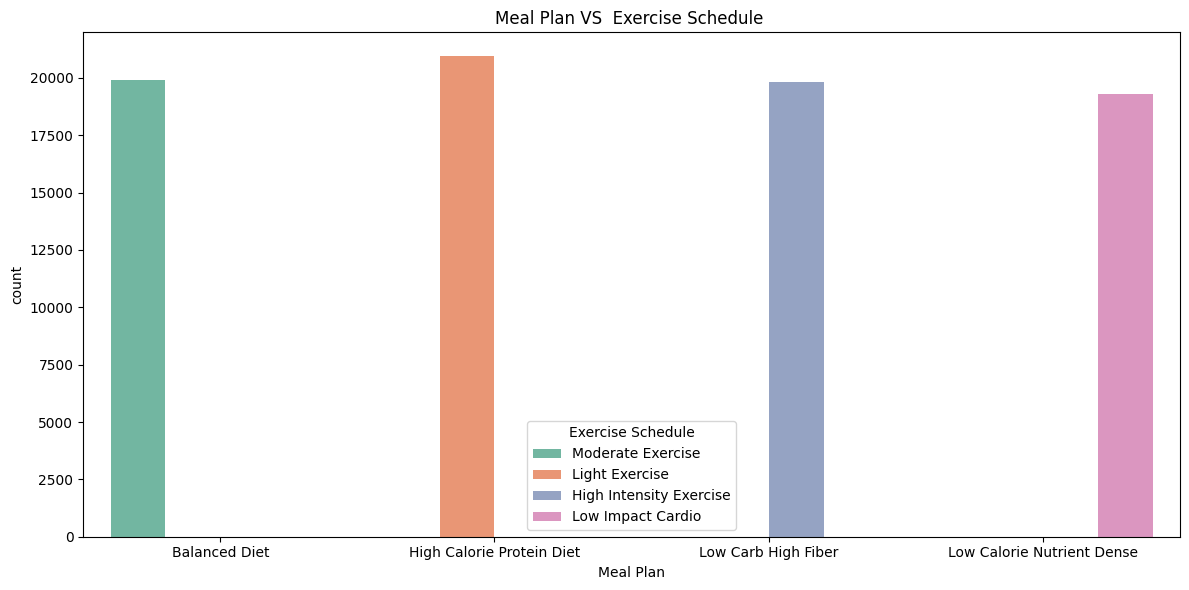

<Figure size 600x400 with 0 Axes>

In [8]:
# lets analyse our each factor with respect to our Exercise Schedule
for col in df.drop(columns = "Exercise Schedule"):
    print(df.groupby(col)["Exercise Schedule"].value_counts())
    print(f"graph for {col}")
    plt.figure(figsize = (12,6))
    sns.countplot(x = col,data =df ,palette="Set2",hue = "Exercise Schedule" )
    plt.title(f"{col} VS  Exercise Schedule ")
    plt.tight_layout()
    plt.figure(figsize = (6,4))
    plt.show()

observation
1. ON BASIS OF MEAL
    * BALANCED DIET TAKER ALWAYS TRAIN ON MODERATE EXERCISE
    * HIGH CALORIES PROTEIN DIET TAKER ALWAYS TRAIN ON LIGHT EXERCISE
    * LOW CARB FIBERT TAKER ALWAYS TRAIN ON HIGH INTENSITY EXERCISE
    * LOW CALORIE NUTRIENT DENSE ALWAYS TRAIN ON LOW IMPACT CARDIO

2. ON BASIS OF BMI
    * Normal weight PEOPLE  Moderate Exercise
    * Obesity PEOPLE PERFORM Low Impact Cardio
    * Overweight PEOPLE PERFORM High Intensity Exercise
    * Underweight PEOPLE PERFORM Light Exercise
3. ON GOAL
    * FOR BAT BURN PEOPLE PERFORMS LIGHT EXERCISE
    * FOR MUSCLES_GAIN PEOPLE PERFORMS LIGHT EXERCIS FOLOWED BY HIGH INTENSITY EXERCISE 

Gender  BMI Category 
Female  Underweight      10680
        Normal weight    10240
        Obesity           9960
        Overweight        9800
Male    Underweight      10260
        Overweight       10040
        Normal weight     9680
        Obesity           9340
Name: count, dtype: int64
graph for Gender


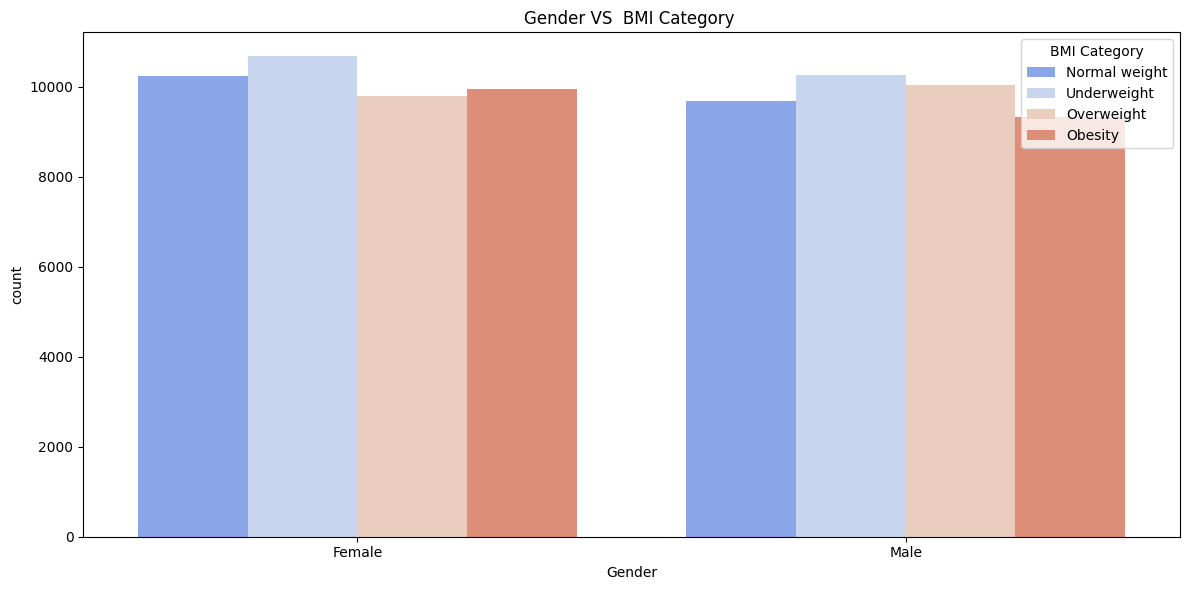

<Figure size 600x400 with 0 Axes>

Goal         BMI Category 
fat_burn     Underweight      10480
             Normal weight     9600
             Obesity           9460
             Overweight        9440
muscle_gain  Underweight      10460
             Overweight       10400
             Normal weight    10320
             Obesity           9840
Name: count, dtype: int64
graph for Goal


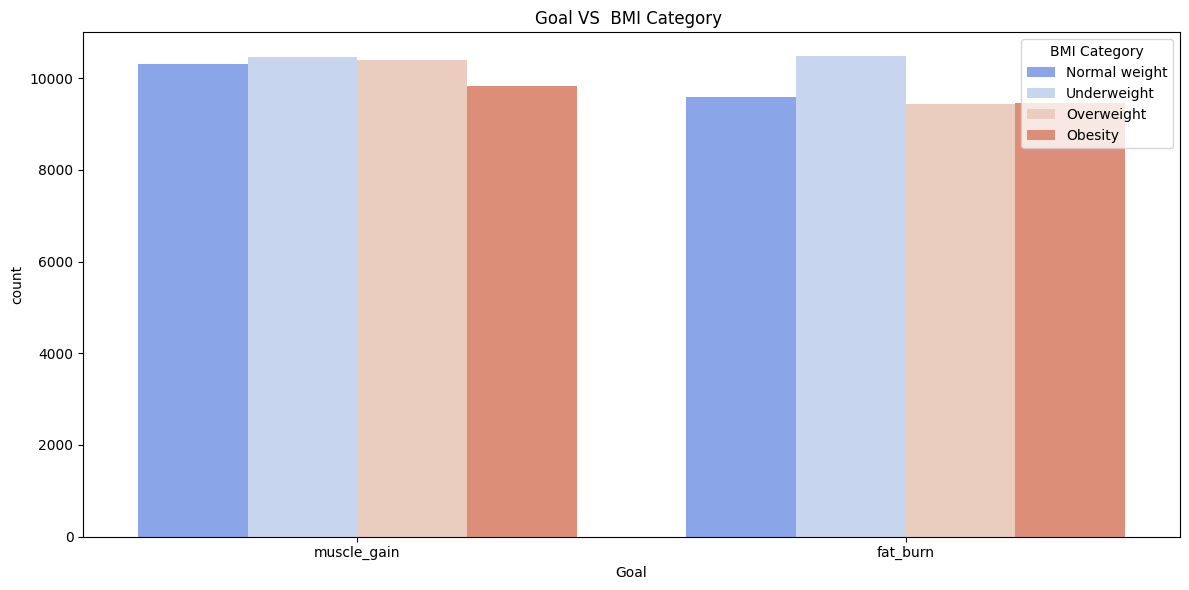

<Figure size 600x400 with 0 Axes>

Exercise Schedule        BMI Category 
High Intensity Exercise  Overweight       19840
Light Exercise           Underweight      20940
Low Impact Cardio        Obesity          19300
Moderate Exercise        Normal weight    19920
Name: count, dtype: int64
graph for Exercise Schedule


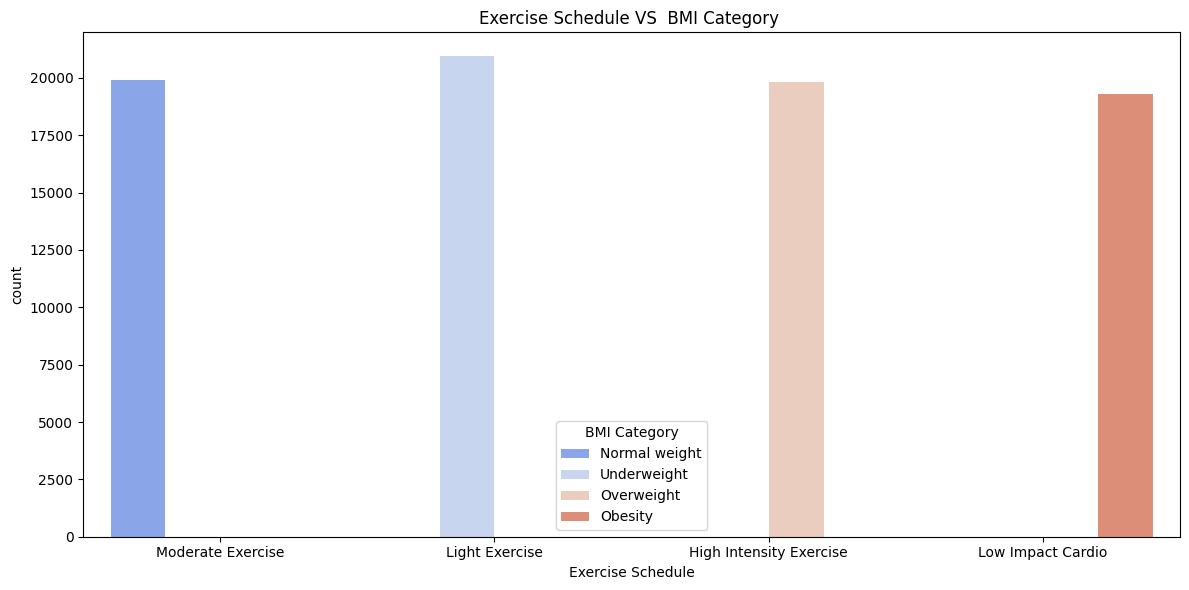

<Figure size 600x400 with 0 Axes>

Meal Plan                   BMI Category 
Balanced Diet               Normal weight    19920
High Calorie Protein Diet   Underweight      20940
Low Calorie Nutrient Dense  Obesity          19300
Low Carb High Fiber         Overweight       19840
Name: count, dtype: int64
graph for Meal Plan


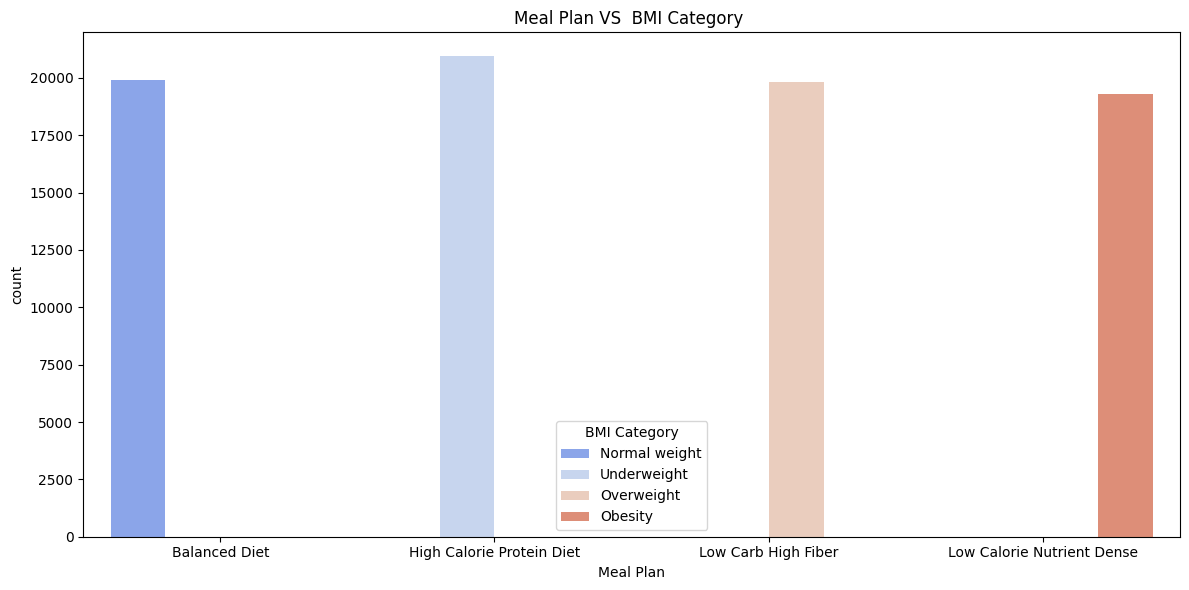

<Figure size 600x400 with 0 Axes>

In [9]:
# SIMILARLAY LETS UNDERSTAND THE DISTRIBUTION ON THE BASIS OF BMI
for col in df.drop(columns = "BMI Category"):
    print(df.groupby(col)["BMI Category"].value_counts())
    print(f"graph for {col}")
    plt.figure(figsize = (12,6))
    sns.countplot(x = col,data =df ,palette="coolwarm",hue = "BMI Category" )
    plt.title(f"{col} VS  BMI Category ")
    plt.tight_layout()
    plt.figure(figsize = (6,4))
    plt.show()


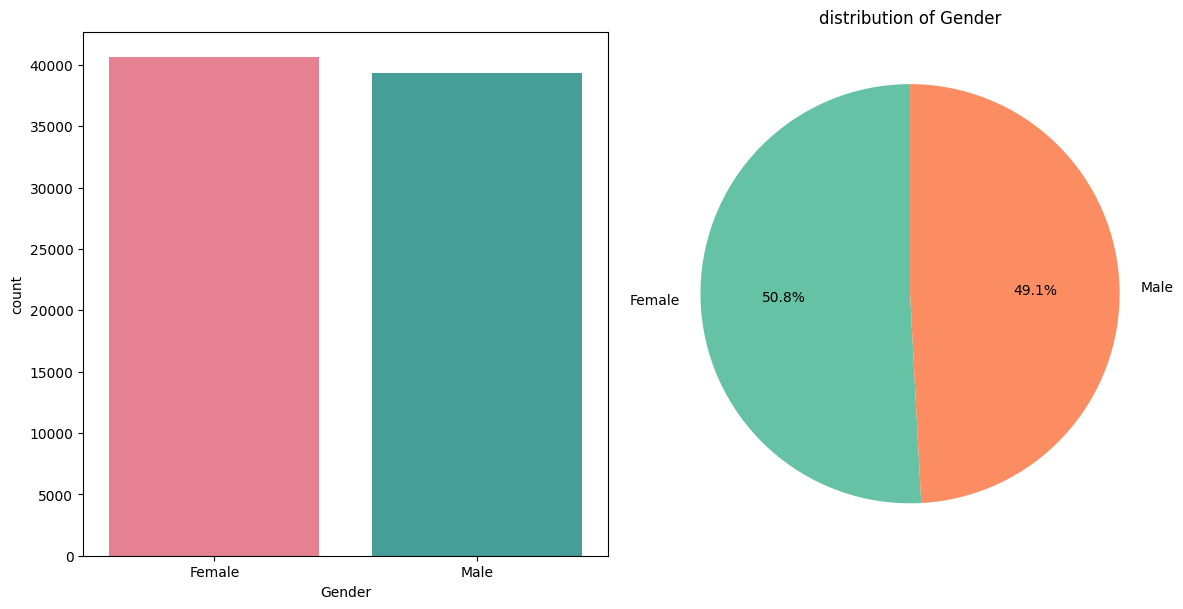

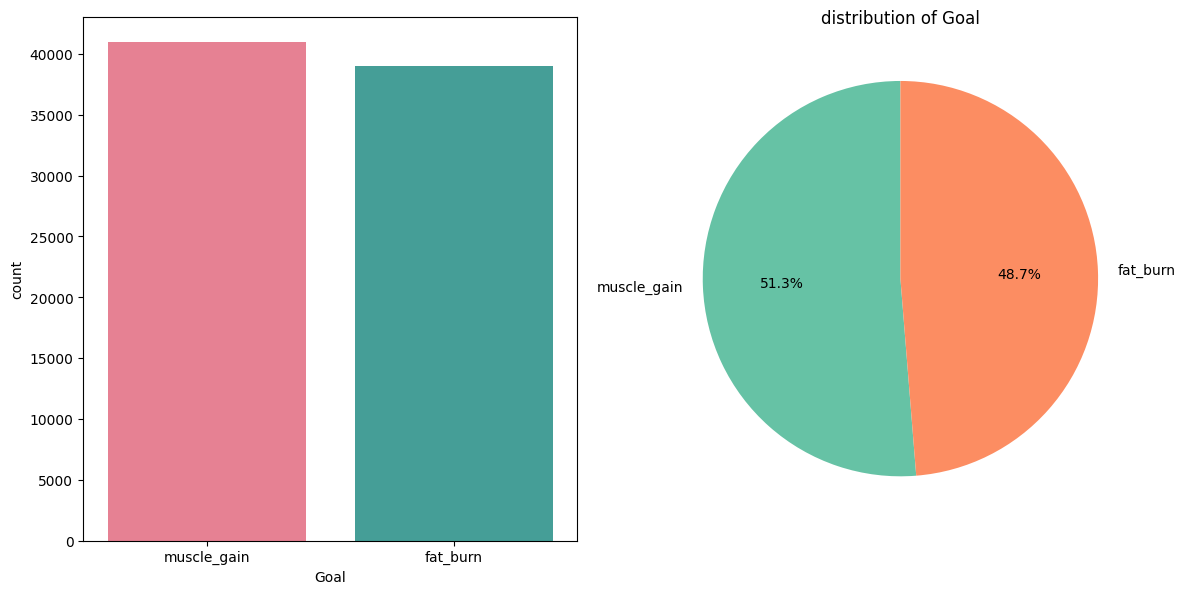

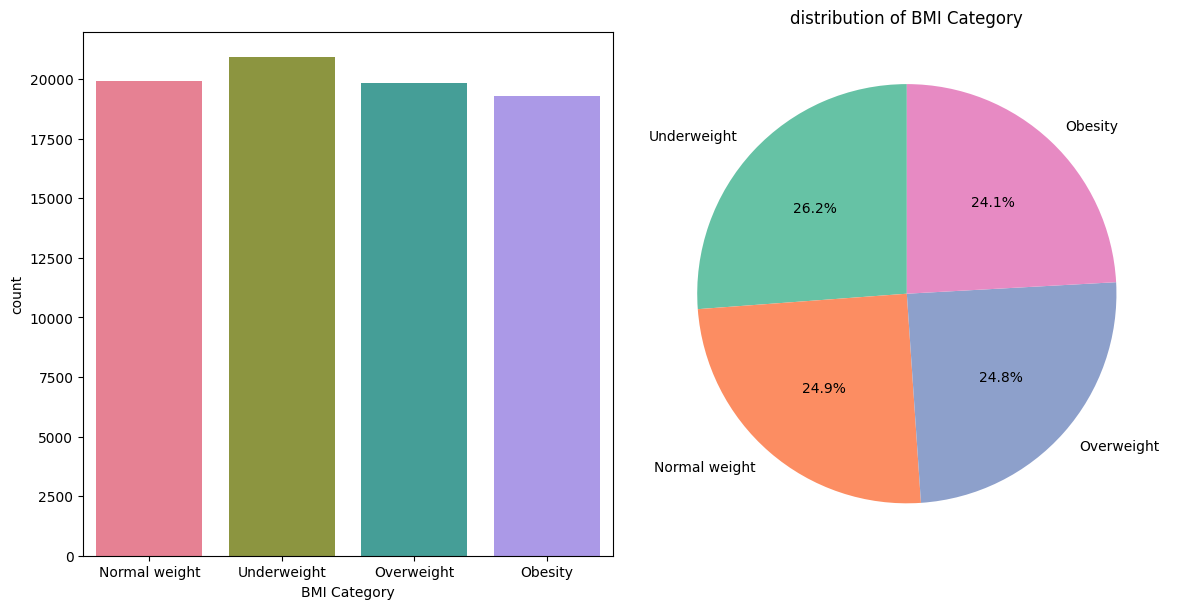

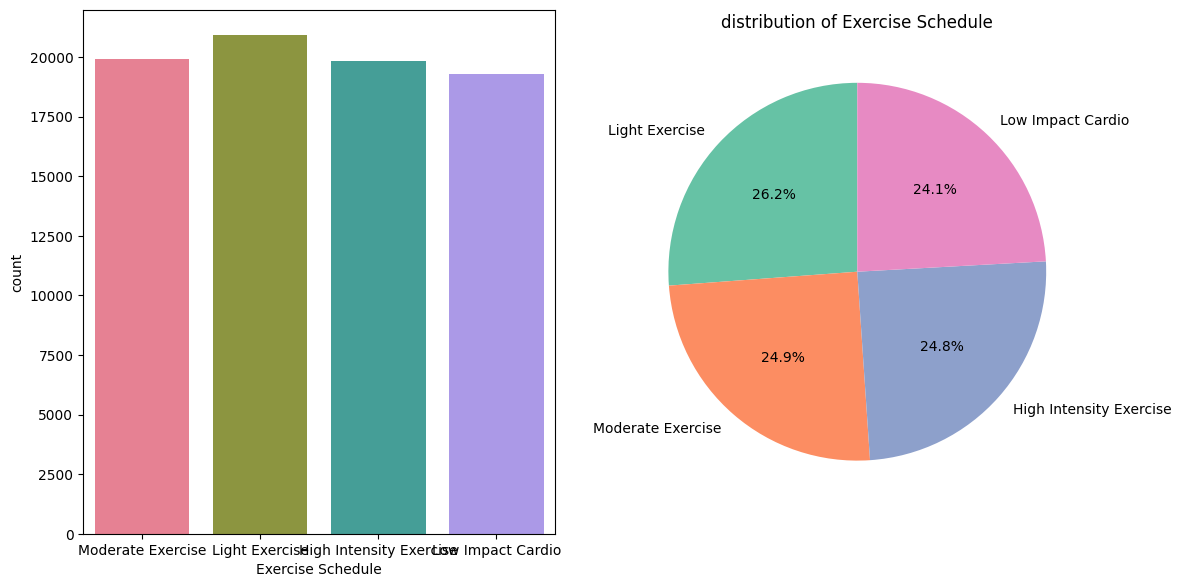

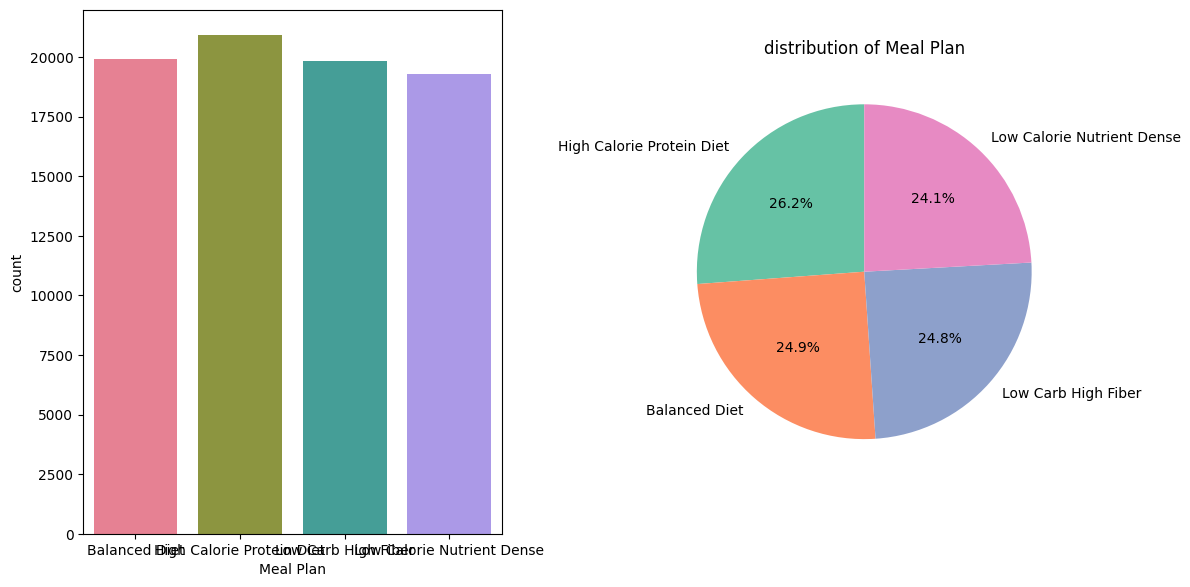

In [10]:
# LETS UNDERTSTAND THE DISTRIBUTION OF PEOPLE ON THE BASIS OF EACH FACTOR IN GYM
for col in df.columns:
    fig,ax = plt.subplots(1,2,figsize = (12,6))
    sns.countplot(x= col,data =df,palette ="husl",ax =ax[0])
    
    #  pie chart
    ax[1].pie(df[col].value_counts(),labels = df[col].value_counts().index,autopct="%1.1f%%",startangle=90,colors=sns.color_palette("Set2"))
    plt.title(f"distribution of {col}")
    plt.tight_layout()
    plt.show()




    

## MODELLING

LETS MAKE A MODEL WHICH PREDICT THE MEAL PLAN

In [11]:
# FEATURE ENG.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dffinal = pd.get_dummies(df, columns=[ "Exercise Schedule",'Gender', 'Goal', 'BMI Category'],dtype = "int")
dffinal['Meal Plan'] = le.fit_transform(df['Meal Plan'])
print(dffinal)

       Meal Plan  Exercise Schedule_High Intensity Exercise  \
0              0                                          0   
1              1                                          0   
2              0                                          0   
3              3                                          1   
4              0                                          0   
...          ...                                        ...   
79995          0                                          0   
79996          1                                          0   
79997          2                                          0   
79998          0                                          0   
79999          3                                          1   

       Exercise Schedule_Light Exercise  Exercise Schedule_Low Impact Cardio  \
0                                     0                                    0   
1                                     1                                    0   
2  

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(dffinal.drop(columns = 'Meal Plan'),dffinal['Meal Plan'],test_size = 0.2,random_state = 1)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
logr = LogisticRegression(n_jobs = -1)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_jobs = -1)
adboost =AdaBoostClassifier()
bag = BaggingClassifier(n_jobs = -1)
knn = KNeighborsClassifier(n_jobs = -1)
models=[logr,tree,forest,adboost,bag,knn]


In [14]:
from sklearn.metrics import accuracy_score

for i in models:
    # fit our model
    i.fit(xtrain,ytrain)
    print(f"{i} succesfully trained")

    # r2 score
    r2 = accuracy_score(ytest,i.predict(xtest))
    print(f"accuracy_score for {i }",r2)

    
    print("\n====================\n")

LogisticRegression(n_jobs=-1) succesfully trained
accuracy_score for LogisticRegression(n_jobs=-1) 1.0


DecisionTreeClassifier() succesfully trained
accuracy_score for DecisionTreeClassifier() 1.0


RandomForestClassifier(n_jobs=-1) succesfully trained
accuracy_score for RandomForestClassifier(n_jobs=-1) 1.0


AdaBoostClassifier() succesfully trained
accuracy_score for AdaBoostClassifier() 1.0


BaggingClassifier(n_jobs=-1) succesfully trained
accuracy_score for BaggingClassifier(n_jobs=-1) 1.0


KNeighborsClassifier(n_jobs=-1) succesfully trained
accuracy_score for KNeighborsClassifier(n_jobs=-1) 1.0




## conclusion for MODEL WHICH PREDICT THE MEAL PLAN
every model predict accurate 

 lets make A MODEL WHICH PREDICT THE exercise sechdule

In [15]:
# FEATURE ENG.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dffinal = pd.get_dummies(df, columns=['Meal Plan' ,'Gender', 'Goal', 'BMI Category'],dtype = "int")
dffinal["Exercise Schedule"] = le.fit_transform(df["Exercise Schedule"])
print(dffinal)

       Exercise Schedule  Meal Plan_Balanced Diet  \
0                      3                        1   
1                      1                        0   
2                      3                        1   
3                      0                        0   
4                      3                        1   
...                  ...                      ...   
79995                  3                        1   
79996                  1                        0   
79997                  2                        0   
79998                  3                        1   
79999                  0                        0   

       Meal Plan_High Calorie Protein Diet  \
0                                        0   
1                                        1   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
79995                                    

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(dffinal.drop(columns = "Exercise Schedule"),dffinal["Exercise Schedule"],test_size = 0.2,random_state = 1)

In [17]:
for i in models:
    # fit our model
    i.fit(xtrain,ytrain)
    print(f"{i} succesfully trained")

    # r2 score
    r2 = accuracy_score(ytest,i.predict(xtest))
    print(f"accuracy_score for {i }",r2)

    
    print("\n====================\n")

LogisticRegression(n_jobs=-1) succesfully trained
accuracy_score for LogisticRegression(n_jobs=-1) 1.0


DecisionTreeClassifier() succesfully trained
accuracy_score for DecisionTreeClassifier() 1.0


RandomForestClassifier(n_jobs=-1) succesfully trained
accuracy_score for RandomForestClassifier(n_jobs=-1) 1.0


AdaBoostClassifier() succesfully trained
accuracy_score for AdaBoostClassifier() 1.0


BaggingClassifier(n_jobs=-1) succesfully trained
accuracy_score for BaggingClassifier(n_jobs=-1) 1.0


KNeighborsClassifier(n_jobs=-1) succesfully trained
accuracy_score for KNeighborsClassifier(n_jobs=-1) 1.0


